In [8]:
pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 7.9 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.2.0-py3-none-any.whl size=158196 sha256=8cfb7d2f88490195d027141f967e9648663303952ce6ea3cc7571b77ead92055
  Stored in directory: /root/.cache/pip/wheels/5a/b5/4e/216953a1c711da55de29ed7ecf158b4a5bf32ef93d69ad66dd
Successfully built fugue-sql-antlr


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.cloud import bigquery
from google.oauth2 import service_account
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

ModuleNotFoundError: No module named 'statsforecast'

In [ ]:
#pip install db-dtypes

# Importando os dados

In [10]:
projeto_id = 'pos-tech-403001'
dataset_id = 'tech_challenge'
tabela_id = 'raw_petr_brent'

In [12]:
# Autenticação para o BigQuery usando arquivo de credenciais
credentials = service_account.Credentials.from_service_account_file('./pos-tech-403001-25c18098d334.json')
client = bigquery.Client(credentials=credentials, project=projeto_id)

In [13]:
# Consulta SQL para selecionar todos os dados da tabela
consulta_sql = f'SELECT * FROM `{projeto_id}.{dataset_id}.{tabela_id}`'

# Executa a consulta
resultado = client.query(consulta_sql)

# Converte o resultado em um DataFrame do Pandas
df = resultado.to_dataframe()

In [14]:
df.head()

,Data,preco_petroleo_bruto
0,30/10/1998,12.0
1,24/06/1998,12.5
2,03/11/1988,12.5
3,29/09/1988,12.5
4,18/02/1994,13.0


In [15]:
df.tail()

,Data,preco_petroleo_bruto
11077,04/05/2006,71.84
11078,16/02/2023,83.84
11079,14/08/2011,103.84
11080,10/08/2011,103.84
11081,15/07/2008,143.68


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  11082 non-null  object 
 1   preco_petroleo_bruto  11082 non-null  float64
dtypes: float64(1), object(1)
memory usage: 173.3+ KB


# Tratando os dados

In [17]:
# transformando a coluna com as datas para Datetime, e ordernando essa coluna
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df = df.sort_values(by='Data', ascending=True)
df.reset_index(inplace=True, drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data                  11082 non-null  datetime64[ns]
 1   preco_petroleo_bruto  11082 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 173.3 KB


In [19]:
df.head()

,Data,preco_petroleo_bruto
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [20]:
df.tail()

,Data,preco_petroleo_bruto
11077,2024-01-02,76.24
11078,2024-01-03,77.18
11079,2024-01-04,75.79
11080,2024-01-05,78.31
11081,2024-01-08,75.47


In [21]:
df.to_csv('df.csv')

# Análise Exploratória

In [24]:
fig = px.line(df, x = 'Data', y='preco_petroleo_bruto')
fig.update_layout(title='Preço Petróleo bruto',
                   xaxis_title='Data',
                   yaxis_title='Preço')
fig.show()

# Modelos Ensemble

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
#df = df.reset_index()
df.head()

,Data,preco_petroleo_bruto
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [ ]:
for lag in range(1,3):
  df[f'preco_lag_{lag}'] = df['preco_petroleo_bruto'].shift(lag)

df_new = df.dropna()
df_new.head()

,Data,preco_petroleo_bruto,preco_lag_1,preco_lag_2
2,1987-05-22,18.55,18.45,18.63
3,1987-05-25,18.60,18.55,18.45
4,1987-05-26,18.63,18.60,18.55
5,1987-05-27,18.60,18.63,18.60
6,1987-05-28,18.60,18.60,18.63


In [ ]:
# Divide em treino e teste
x = df_new[['preco_lag_1','preco_lag_2']].values
y = df_new['preco_petroleo_bruto'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=False)
print(f'Tamanho da base de treino:{x_train.shape}')
print(f'Tamanho da base de teste:{x_test.shape}')

Tamanho da base de treino:(8864, 2)
Tamanho da base de teste:(2216, 2)


In [ ]:
# Modelo Boosting
model_xgb = GradientBoostingRegressor(loss='squared_error')
model_xgb.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Modelo Random Forest
model_rf = RandomForestRegressor(max_depth=3, random_state=0)
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, random_state=0)

# Prophet

In [22]:
from prophet import Prophet

In [71]:
df_prophet = df[['Data', 'preco_petroleo_bruto']]
df_prophet.columns = ['ds','y']
df_prophet.tail()

,ds,y
11077,2024-01-02,76.24
11078,2024-01-03,77.18
11079,2024-01-04,75.79
11080,2024-01-05,78.31
11081,2024-01-08,75.47


In [72]:
df_prophet = df_prophet.query('ds >= "2000-01-01"')
df_prophet.head()

,ds,y
3200,2000-01-04,23.95
3201,2000-01-05,23.72
3202,2000-01-06,23.55
3203,2000-01-07,23.35
3204,2000-01-10,22.77


In [80]:
x_train_p, x_test_p = train_test_split(df_prophet,test_size=0.01, shuffle=False)
print(f'Tamanho da base de treino:{x_train_p.shape}')
print(f'Tamanho da base de teste:{x_test_p.shape}')

Tamanho da base de treino:(7803, 2)
Tamanho da base de teste:(79, 2)


In [81]:
model_prophet = Prophet()
model_prophet.fit(x_train_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbke2iws/08fwl47t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbke2iws/zc5gy5ta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63306', 'data', 'file=/tmp/tmpsbke2iws/08fwl47t.json', 'init=/tmp/tmpsbke2iws/zc5gy5ta.json', 'output', 'file=/tmp/tmpsbke2iws/prophet_model4s6vd_1o/prophet_model-20240121175744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:57:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [82]:
forecast = model_prophet.predict(x_test_p)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2024-01-02,88.121976,69.525173,98.826425,87.612236,88.725317,-3.924452,-3.924452,-3.924452,-0.111022,-0.111022,-0.111022,-3.813429,-3.813429,-3.813429,0.0,0.0,0.0,84.197524
75,2024-01-03,88.136384,68.227008,97.991553,87.618962,88.748978,-3.976919,-3.976919,-3.976919,-0.191057,-0.191057,-0.191057,-3.785862,-3.785862,-3.785862,0.0,0.0,0.0,84.159465
76,2024-01-04,88.150791,70.460060,100.257925,87.608749,88.777126,-3.839744,-3.839744,-3.839744,-0.084536,-0.084536,-0.084536,-3.755208,-3.755208,-3.755208,0.0,0.0,0.0,84.311047
77,2024-01-05,88.165198,69.301195,99.366320,87.594223,88.805909,-3.782085,-3.782085,-3.782085,-0.060335,-0.060335,-0.060335,-3.721750,-3.721750,-3.721750,0.0,0.0,0.0,84.383113
78,2024-01-08,88.208421,70.030837,98.686549,87.592834,88.849184,-3.676400,-3.676400,-3.676400,-0.067852,-0.067852,-0.067852,-3.608548,-3.608548,-3.608548,0.0,0.0,0.0,84.532021


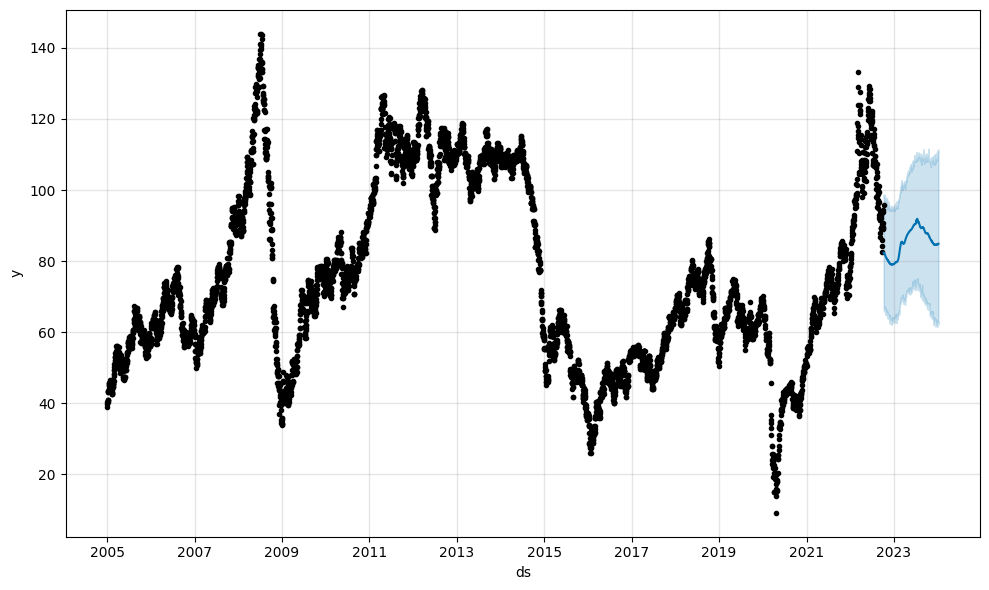

In [64]:
fig = model_prophet.plot(forecast)

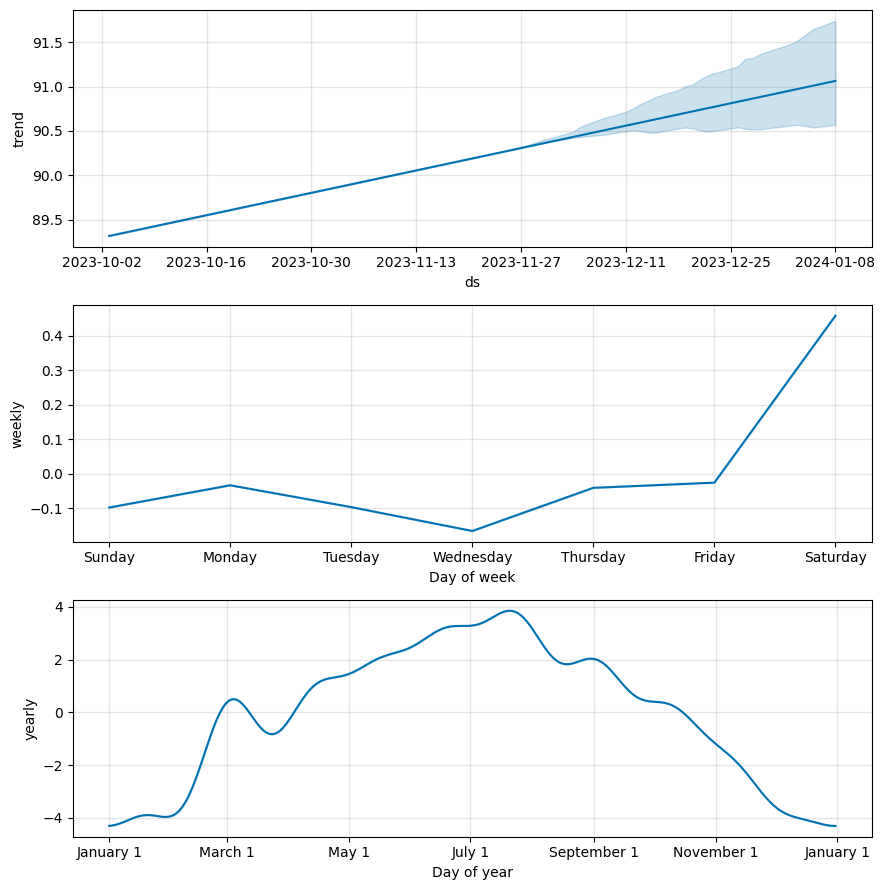

In [55]:
fig2 = model_prophet.plot_components(forecast)

In [83]:
pred = forecast[['ds','yhat']]
pred

,ds,yhat
0,2023-09-12,87.887844
1,2023-09-13,87.716321
2,2023-09-14,87.731306
3,2023-09-15,87.665500
4,2023-09-18,87.412134
...,...,...
74,2024-01-02,84.197524
75,2024-01-03,84.159465
76,2024-01-04,84.311047
77,2024-01-05,84.383113


In [84]:
out = x_test_p.merge(pred, how = 'inner', left_on = 'ds', right_on = 'ds')
out.head()

,ds,y,yhat
0,2023-09-12,93.58,87.887844
1,2023-09-13,93.04,87.716321
2,2023-09-14,95.20,87.731306
3,2023-09-15,95.55,87.665500
4,2023-09-18,95.95,87.412134


In [41]:
future = m.make_future_dataframe(periods=2216, freq='D')
future.tail(10)

,ds
13177,2029-08-09
13178,2029-08-10
13179,2029-08-11
13180,2029-08-12
13181,2029-08-13
13182,2029-08-14
13183,2029-08-15
13184,2029-08-16
13185,2029-08-17
13186,2029-08-18


In [45]:
pred = forecast.query('ds > "2023-07-26"')[['ds','yhat']]
pred

,ds,yhat
1,2023-07-27,89.512023
2,2023-07-28,89.515927
3,2023-07-31,89.482531
4,2023-08-01,89.394717
5,2023-08-02,89.341752
...,...,...
106,2024-01-02,87.218620
107,2024-01-03,87.234586
108,2024-01-04,87.359384
109,2024-01-05,87.419053


## Resultados

In [85]:
#pred_xgb = model_xgb.predict(x_test)
#pred_rf = model_rf.predict(x_test)
pred_prophet = forecast['yhat']

In [86]:
print('------------------Prophet------------------\n')
y_true = out['y']
print('MSE: ',mean_squared_error(y_true,pred_prophet))
print('MAE: ',mean_absolute_error(y_true,pred_prophet))
print(f'R2: {r2_score(y_true,pred_prophet)}')

------------------Prophet------------------

MSE:  33.39108279587497
MAE:  5.131458214737452
R2: 0.33147272505905145


In [ ]:
print('------------------Gradient Boosting------------------\n')
print(f'MSE: {mean_squared_error(y_test,pred_xgb)}')
print(f'MAE: {mean_absolute_error(y_test,pred_xgb)}')
print(f'R2: {r2_score(y_test,pred_xgb)}')

print('------------------Random Forest------------------\n')
print(f'MSE: {mean_squared_error(y_test,pred_rf)}')
print(f'MAE: {mean_absolute_error(y_test,pred_rf)}')
print(f'R2: {r2_score(y_test,pred_rf)}')

print('------------------Prophet------------------\n')
y_true = out['y']
print('MSE: ',mean_squared_error(y_true,pred_prophet))
print('MAE: ',mean_absolute_error(y_true,pred_prophet))
print(f'R2: {r2_score(y_true,pred_prophet)}')

------------------Gradient Boosting------------------

MSE: 3.084069396339292
MAE: 1.208508337072504
R2: 0.9917342010572776
------------------Random Forest------------------

MSE: 16.46245003382319
MAE: 3.362336553084329
R2: 0.9558780025359632
------------------Prophet------------------

MSE:  37.793821568260086
MAE:  5.232571249184433
R2: 0.0054393288368390635


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15,5))
plt.plot(df_new['Data'][-2216:], y_test, label = 'Real')
plt.plot(df_new['Data'][-2216:], pred_xgb, label = 'Gradient Boosting')
plt.plot(df_new['Data'][-2216:], pred_rf, label = 'Random Forest')

plt.legend()
plt.show()

In [ ]:
datelist = pd.date_range(df_new['Data'].max(), periods=10).tolist()
df = pd.DataFrame({'Data':datelist})
df.head()

# Salva Modelo

In [5]:
import joblib
import pandas as pd


In [89]:
joblib.dump(model_prophet, 'model_prophet.joblib')

['model_prophet.joblib']

In [2]:
model_prophet = joblib.load('model_prophet.joblib')
model_prophet

In [17]:

datas = ['18-01-2024']
out = pd.DataFrame(datas, columns = ['ds'])
out['ds'] = pd.to_datetime(out['ds'])
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 136.0 bytes


<ipython-input-17-7edb9ac10dd3>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  out['ds'] = pd.to_datetime(out['ds'])


In [21]:
model_prophet.predict(out)[['ds','yhat']]

,ds,yhat
0,2024-01-18,84.999763
